# Examples and use cases for the cluster_dag module

In [1]:
from clustcausal.clusterdag.cluster_dag import CDAG

In [2]:
# Define a cluster DAG
cluster_dict = {}
cluster_dict['clusters'] = {'C1':['X1','X2','X3'], 'C2': ['X4','X5'], 'C3':['X6','X7'], 'C4':['X8','X9']}
cluster_dict['cluster_edges'] = [('C1','C3'), ('C2','C3'), ('C3','C4'), ('C2','C4')] 
cdag = CDAG(cluster_mapping=cluster_dict['clusters'], cluster_edges = cluster_dict['cluster_edges'])

2023-06-23 16:19:55,969 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:65] - INFO: removed edge: (C1,C2)
2023-06-23 16:19:55,970 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:69] - INFO: oriented edge: (C1,C3)
2023-06-23 16:19:55,970 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:65] - INFO: removed edge: (C1,C4)
2023-06-23 16:19:55,971 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:69] - INFO: oriented edge: (C2,C3)
2023-06-23 16:19:55,971 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:69] - INFO: oriented edge: (C2,C4)
2023-06-23 16:19:55,972 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:69] - INFO: oriented edge: (C3,C4)


In [3]:
print(cdag.get_cluster_topological_ordering())

['C1', 'C2', 'C3', 'C4']


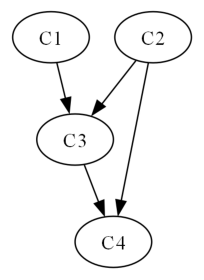

In [4]:
cdag.draw_cluster_graph()

2023-06-23 16:19:56,397 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:91] - INFO: removed edge: (X1,X4)
2023-06-23 16:19:56,398 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:91] - INFO: removed edge: (X1,X5)
2023-06-23 16:19:56,398 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:95] - INFO: oriented edge: (X1,X6)
2023-06-23 16:19:56,399 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:95] - INFO: oriented edge: (X1,X7)
2023-06-23 16:19:56,400 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:91] - INFO: removed edge: (X1,X8)
2023-06-23 16:19:56,401 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\clustcausal\clusterdag\cluster_dag.py[line:91] - INFO: removed edge: (X1,X9)
2023-06-23 16:19:56,401 - c:\Users\JanMarco\MLProj

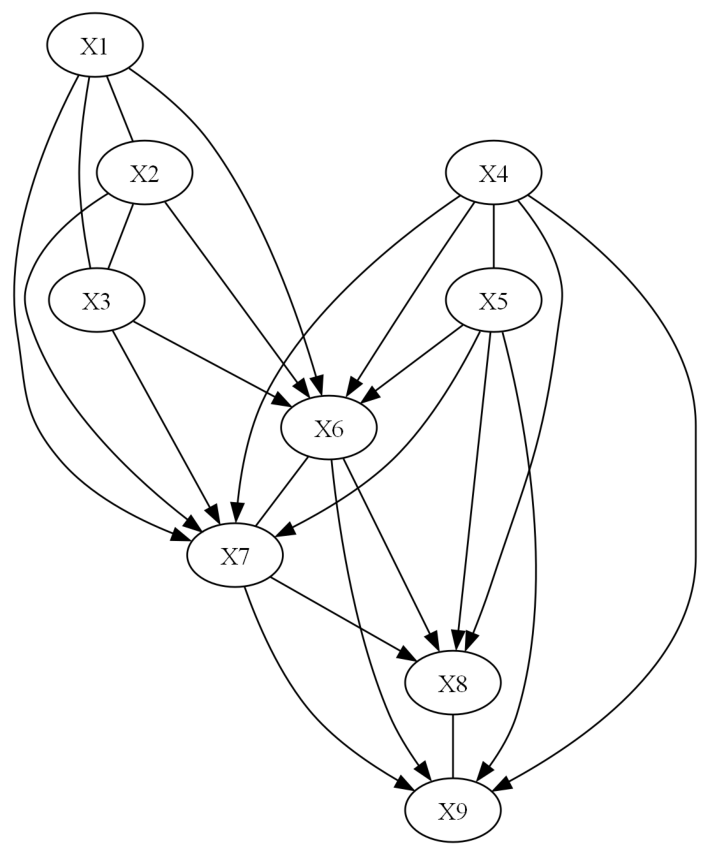

In [5]:
cdag.cdag_to_mpdag()
cdag.draw_mpdag()

### Restricting graph - example

In [6]:
cluster3 = cdag.get_node_by_name('C3', cdag.cluster_graph)
cluster3

In [7]:
c3_relevant_clusters, c3_relevant_nodes = cdag.get_parents_plus(cluster3)
print(c3_relevant_clusters)
print(c3_relevant_nodes)

[<causallearn.graph.GraphNode.GraphNode object at 0x00000151834B4E20>, <causallearn.graph.GraphNode.GraphNode object at 0x00000151834B6200>, <causallearn.graph.GraphNode.GraphNode object at 0x00000151834B6260>]
[<causallearn.graph.GraphNode.GraphNode object at 0x0000015183831000>, <causallearn.graph.GraphNode.GraphNode object at 0x0000015183830A60>, <causallearn.graph.GraphNode.GraphNode object at 0x00000151834D71F0>, <causallearn.graph.GraphNode.GraphNode object at 0x00000151834D7220>, <causallearn.graph.GraphNode.GraphNode object at 0x00000151837C7E20>, <causallearn.graph.GraphNode.GraphNode object at 0x0000015183830F70>, <causallearn.graph.GraphNode.GraphNode object at 0x00000151838308E0>]


In [8]:
clust_names = []
node_names = []
for clust in c3_relevant_clusters:
    clust_names.append(clust.get_name())
for node in c3_relevant_nodes:
    node_names.append(node.get_name())
print(clust_names, node_names)

['C3', 'C1', 'C2'] ['X6', 'X7', 'X1', 'X2', 'X3', 'X4', 'X5']


In [99]:
import numpy as np
array = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        array[i,j] = i+j
delete = [1,2,4]
arr = np.delete(array, delete, axis=0)
arr

array([[0., 1., 2., 3., 4.],
       [1., 2., 3., 4., 5.],
       [2., 3., 4., 5., 6.],
       [3., 4., 5., 6., 7.],
       [4., 5., 6., 7., 8.]])

In [101]:
delete = [1,2,4]
arr = np.delete(array, delete, axis=0)
arr


array([[0., 1., 2., 3., 4.],
       [3., 4., 5., 6., 7.]])

In [96]:
for i in range(5):
    if i % 2 == 0:
        array = np.delete(array, i, axis=0)
array

IndexError: index 4 is out of bounds for axis 0 with size 3

In [105]:
_ , relevant_nodes = cdag.get_parents_plus(cluster3) # A list of nodes (node objects)
cdag.get_local_graph(cluster3)

IndexError: index 8 is out of bounds for axis 0 with size 8

In [104]:
_ , relevant_nodes = cdag.get_parents_plus(cluster3)
relevant_node_names = []
for node in relevant_nodes:
    relevant_node_names.append(node.get_name())
relevant_node_names
relevant_nodes
type(relevant_nodes[0])

causallearn.graph.GraphNode.GraphNode

In [87]:
from causallearn.graph.GraphClass import CausalGraph
test = CausalGraph(no_of_var=7, node_names=relevant_node_names)
restricted_nodes = relevant_nodes[0:6]
print(len(restricted_nodes))
subgraph = test.G.subgraph(restricted_nodes)

6


[<causallearn.graph.GraphNode.GraphNode object at 0x00000151892171F0>, <causallearn.graph.GraphNode.GraphNode object at 0x00000151898385E0>, <causallearn.graph.GraphNode.GraphNode object at 0x0000015189839F30>, <causallearn.graph.GraphNode.GraphNode object at 0x0000015189839F90>]
<class 'causallearn.graph.GraphNode.GraphNode'>


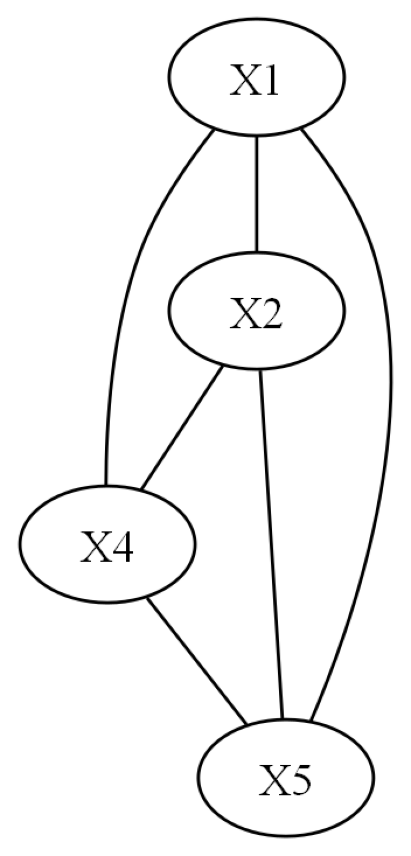

In [89]:
# Import CausalGraph class
from causallearn.graph.GraphClass import CausalGraph
test = CausalGraph(no_of_var=5, node_names=['X1','X2','X3','X4','X5'])
node_list = test.G.get_nodes()
restricted_nodes = node_list[0:2] + node_list[3:5]
subgraph = test.G.subgraph(restricted_nodes)

print(restricted_nodes)
print(type(restricted_nodes[0]))
test.G = subgraph
test.draw_pydot_graph()

In [93]:
print(type(node_list[0]),
type(restricted_nodes[0]))

<class 'causallearn.graph.GraphNode.GraphNode'> <class 'causallearn.graph.GraphNode.GraphNode'>


In [24]:
cdag.cg.G.graph

array([[ 0, -1, -1,  0,  0, -1, -1,  0,  0],
       [-1,  0, -1,  0,  0, -1, -1,  0,  0],
       [-1, -1,  0,  0,  0, -1, -1,  0,  0],
       [ 0,  0,  0,  0, -1, -1, -1, -1, -1],
       [ 0,  0,  0, -1,  0, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  1,  0, -1, -1, -1],
       [ 1,  1,  1,  1,  1, -1,  0, -1, -1],
       [ 0,  0,  0,  1,  1,  1,  1,  0, -1],
       [ 0,  0,  0,  1,  1,  1,  1, -1,  0]])

In [27]:
import numpy as np
graph = np.delete(cdag.cg.G.graph, 8, axis=0)
graph = np.delete(graph, 8, axis=1)
graph

array([[ 0, -1, -1,  0,  0, -1, -1,  0],
       [-1,  0, -1,  0,  0, -1, -1,  0],
       [-1, -1,  0,  0,  0, -1, -1,  0],
       [ 0,  0,  0,  0, -1, -1, -1, -1],
       [ 0,  0,  0, -1,  0, -1, -1, -1],
       [ 1,  1,  1,  1,  1,  0, -1, -1],
       [ 1,  1,  1,  1,  1, -1,  0, -1],
       [ 0,  0,  0,  1,  1,  1,  1,  0]])

In [32]:
cdag.cg.G.nodes[8].get_name()

'X9'

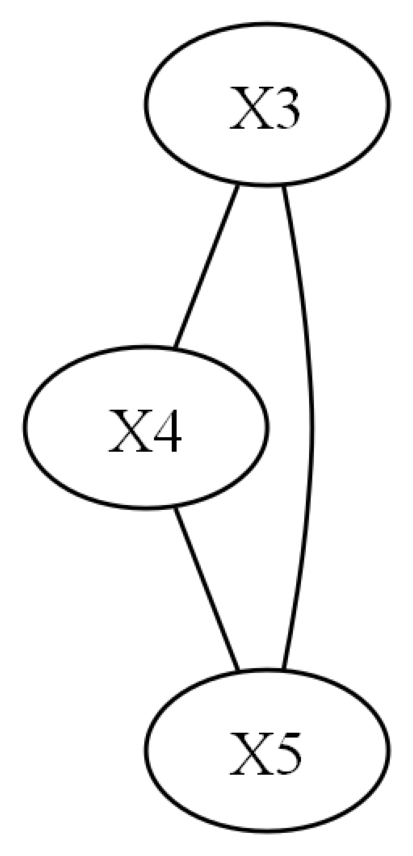

In [60]:
test = CausalGraph(no_of_var=5, node_names=['X1','X2','X3','X4','X5'])
node_list = test.G.get_nodes()
subgraph = test.G.subgraph(node_list[2:5])
test.G = subgraph
test.draw_pydot_graph()

In [56]:
subgraph = test.G.subgraph(node_names[0:5])

IndexError: index 3 is out of bounds for axis 0 with size 2

In [55]:
cdag.get_local_graph(cluster3)

IndexError: index 8 is out of bounds for axis 0 with size 8

In [17]:
cdag.get_local_graph(cluster3)

IndexError: index 8 is out of bounds for axis 0 with size 8

In [12]:
local_graph = CausalGraph(no_of_var = len(relevant_node_names), node_names = relevant_node_names)

In [13]:
# #!/usr/bin/env python3
# from __future__ import annotations

# from abc import ABC
# from typing import List, Dict, Tuple

# import numpy as np
# from numpy import ndarray
# from causallearn.graph.Edge import Edge
# from causallearn.graph.Endpoint import Endpoint
# from causallearn.graph.Graph import Graph
# from causallearn.graph.Node import Node
# from causallearn.utils.GraphUtils import GraphUtils
# from causallearn.graph.GeneralGraph import GeneralGraph

# # def subgraph(self, nodes: List[Node]):
# nodes = relevant_nodes
# subgraph = GeneralGraph(nodes)

# graph = local_graph

# for i in range(subgraph.num_vars):
#     if not (local_graph.G.nodes[i] in nodes):
#         graph = np.delete(graph, i, axis=0)

# for i in range(subgraph.num_vars):
#     if not (local_graph.G.nodes[i] in nodes):
#         graph = np.delete(graph, i, axis=1)

# local_graph.G = graph
# # subgraph.reconstitute_dpath(subgraph.get_graph_edges())

In [14]:
# local_graph.draw_pydot_graph()

In [15]:
# local_graph.G = cdag.cg.G.subgraph(relevant_nodes)

IndexError: index 8 is out of bounds for axis 0 with size 8

In [16]:
# Local graph - cluster 3 and its parents
graph_restricted_to_c3 = cdag.get_local_graph(cluster3)


IndexError: index 8 is out of bounds for axis 0 with size 8